# Logistic Regression

Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring. An example of logistic regression could be applying machine learning to determine if a person is likely to be infected with COVID-19 or not.

Here we will do the below following steps - 

- Data Preparation
- Visualisation
- Create train and test set
- Predictions
- Decision boundary
- How to use sk learn


In [1]:
# Data generation using numpy
import numpy as np
import matplotlib.pyplot as plt



In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])


dist_01 = np.random.multivariate_normal(mean_01, cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

In [3]:
print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


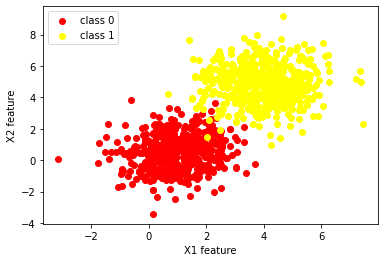

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1], color="red", label = "class 0")
plt.scatter(dist_02[:,0],dist_02[:,1], color="yellow", label = "class 1")
plt.xlabel("X1 feature")
plt.ylabel("X2 feature")
plt.legend()
plt.show()

In [5]:
data = np.zeros((1000,3))


In [6]:
data[:500,:2] = dist_01
data[500:, :2] = dist_02

data[500:,-1] = 1

In [7]:
# randomly shuffle the data
np.random.shuffle(data)

In [8]:
print(data[:10])

[[ 2.36879363 -0.08139269  0.        ]
 [-1.41550653  2.31917927  0.        ]
 [ 2.05380625  0.57177986  0.        ]
 [ 2.35333051  0.03144449  0.        ]
 [ 0.92394758  2.0044423   0.        ]
 [ 1.77193369 -1.04806031  0.        ]
 [ 0.91414827 -1.15196171  0.        ]
 [ 0.42493661 -0.90114101  0.        ]
 [ 1.41332445 -0.18858588  0.        ]
 [ 4.18821369  4.75091819  1.        ]]


In [9]:
# Divide the data into train and test set
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

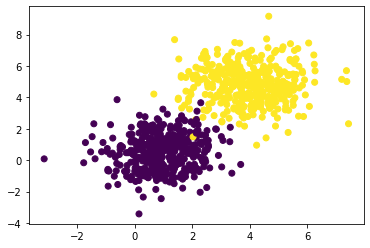

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)

In [11]:
# Data normalisation
x_mean = X_train.mean(axis=0)

In [12]:
x_mean

array([2.42451477, 2.63197215])

In [13]:
x_std = X_train.std(axis=0)

In [14]:
x_std

array([1.82789842, 2.45747574])

In [15]:
#apply the transformation
X_train = (X_train-x_mean)/x_std
X_test = (X_test-x_mean)/x_std

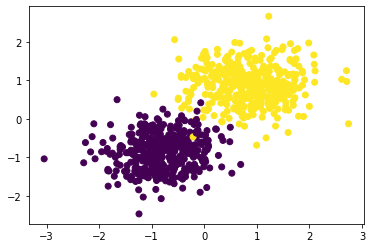

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)

# Logistic Regression implementation


In [17]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X, theta):
    '''
    X - entire array (m,n+1)
    theta - np.array(n+1,1)
    '''
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    params:
    X - (m,n+1)
    Y - (m,1)
    theta - (n+1,1)
    
    return:
        scale_value = loss
    """
    hi = hypothesis(X,theta)
    error = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    
    return error
    
    

In [18]:
def gradient(X,y,theta):
    """
    params:
    X - (m,n+1)
    Y - (m,1)
    theta - (n+1,1)
    
    return:
        gradient_vector - (n+1,1)
    """
    hi=hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m
    
    
def gradient_descent(X,y,lr=0.1,max_itr=500):
    
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        
        grad = gradient(X,y,theta)
        
        theta = theta+lr*grad
    return (theta,error_list)

In [19]:
ones = np.ones((X_train.shape[0],1))
x_new_train = np.hstack((ones,X_train))
print(x_new_train.shape)

(800, 3)


In [20]:
x_new_train

array([[ 1.        , -0.03048372, -1.1041268 ],
       [ 1.        , -2.10078484, -0.12728218],
       [ 1.        , -0.20280587, -0.83833677],
       ...,
       [ 1.        ,  1.23467347,  1.22879998],
       [ 1.        , -0.88540769, -1.17926538],
       [ 1.        ,  1.72237179,  1.02269611]])

In [21]:
theta,error_list = gradient_descent(x_new_train, Y_train)

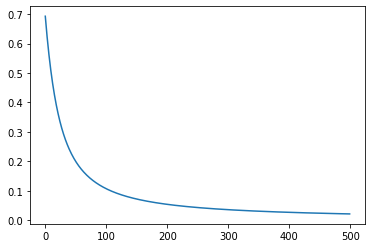

In [22]:
plt.plot(error_list)

In [24]:
# visualisation and prediction are missing

ValueError: operands could not be broadcast together with shapes (800,) (7,) 

In [25]:
#using sklearn for creating a logistic regression model
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

LogisticRegression()

In [28]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0, theta_s)

[0.04304223] [[3.02373172 4.37904359]]
